### Juan Pablo Fonseca Correa 138263
### Ejercicio KNN

In [51]:
# importamos librerías
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from math import fabs
from __future__ import division
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from random import uniform
%matplotlib inline

##### Cuatro círculos en el plano:

In [81]:
dataPoints1 = np.random.rand(100,2)*2-(1,1) # centro = (0,0), radio = 1
dataPoints2 = np.random.rand(50,2)+(1.5,0.5)   # centro = (2,1), radio = 0.5
dataPoints3 = np.random.rand(50,2)+(-1.5,1) # centro = (-1,1.5), radio = 0.5
dataPoints4 = np.random.rand(50,2)+(0,2.5) # centro = (0.5,3), radio = 0.5

# clasificaciones de cada cluster de datos (no dos, sino CUATRO categorías)
y1 = [1]*100
y2 = [2]*50
y3 = [3]*50
y4 = [4]*50

In [82]:
y = np.concatenate((y1,y2,y3,y4))
X = np.concatenate((dataPoints1,dataPoints2,dataPoints3,dataPoints4))

vecinos = 18 # vecinos que consideras (k)
h = .02  # para la generación del meshgrid

In [83]:
# Colores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#FAFFAF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#F0FF0F'])

### KNN:

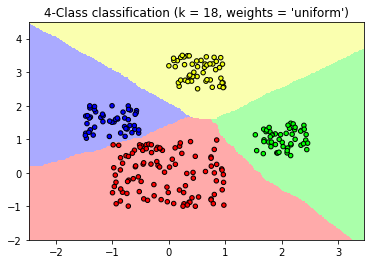

In [86]:

    # ajustamos los datos
clf = neighbors.KNeighborsClassifier(vecinos, weights='uniform')
clf.fit(X, y)

    # Frontera de decisión, cada una con un color distinto
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Dibujamos el resultado en la gráfica
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Mostramos en la gráfica los datos de entrenamiento también
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("4-Class classification (k = %i, weights = '%s')"
              % (vecinos, 'uniform'))

plt.show()

### SVM:

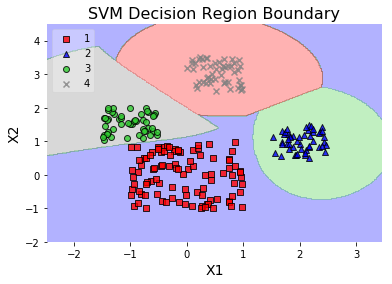

In [87]:
clf2 = SVC(C = 10)
clf2.fit(X, y)
Xdf = pd.DataFrame(data=X)
Ydf = pd.DataFrame(data=y)
# Graficar regiones de decisión
plot_decision_regions(X=Xdf.values, 
                      y=Ydf.values.ravel(),
                      clf=clf2, 
                      legend=2)

# Info de la tabla para que se vea bien
plt.xlabel("X1", size=14)
plt.ylabel("X2", size=14)

plt.title('SVM Decision Region Boundary', size=16)
plt.show()

#### Observamos que tanto KNN como SVM logran dividir exitosamente los datos de entrada. El kernel utilizado en SVM fue rbf (radial basis function), que intuitivamente encierra en aproximaciones a círculos cada grupo, mientras que las divisiones que KNN hace son más cercanas a líneas rectas. Aunque ambos métodos funcionen bien, parecería que las divisiones de KNN son más naturales que las que hace SVM. Sin embargo, habría que probar con diferentes datos y ver cómo se desempeñan.

### Varios círculos; datos distribuidos uniformemente.
### Dentro de los círculos la clasificación es 1; afuera es 0

In [121]:
dp1 = np.random.rand(500,2)*6-3


In [122]:
y = [0]*500
for i in range(len(dp1)):
    if((dp1[i][0])**2+(dp1[i][1]+1)**2<=1 or 
      (dp1[i][0]-2)**2+(dp1[i][1]-1)**2<=0.5 or
      (dp1[i][0]+1)**2+(dp1[i][1]-1.5)**2<=0.5 or
      (dp1[i][0]-0.5)**2+(dp1[i][1]-2.5)**2<=0.5):
        y[i] = 1
    

### KNN:

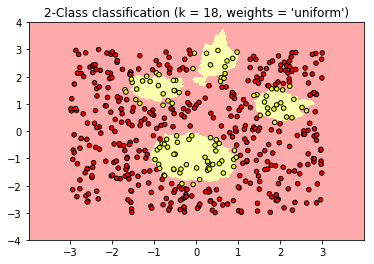

In [123]:
# ajustamos los datos
clf3 = neighbors.KNeighborsClassifier(vecinos, weights='uniform')
clf3.fit(dp1, y)

    # Frontera de decisión, cada una con un color distinto
x_min, x_max = dp1[:, 0].min() - 1, dp1[:, 0].max() + 1
y_min, y_max = dp1[:, 1].min() - 1, dp1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf3.predict(np.c_[xx.ravel(), yy.ravel()])

    # Dibujamos el resultado en la gráfica
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Mostramos en la gráfica los datos de entrenamiento también
plt.scatter(dp1[:, 0], dp1[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i, weights = '%s')"
              % (vecinos, 'uniform'))

plt.show()

### SVM:

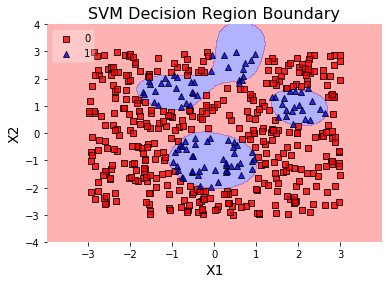

In [124]:
clf4 = SVC(C = 10)
clf4.fit(dp1, y)
Xdf = pd.DataFrame(data=dp1)
Ydf = pd.DataFrame(data=y)
# Graficar regiones de decisión
plot_decision_regions(X=Xdf.values, 
                      y=Ydf.values.ravel(),
                      clf=clf4, 
                      legend=2)

# Info de la tabla para que se vea bien
plt.xlabel("X1", size=14)
plt.ylabel("X2", size=14)

plt.title('SVM Decision Region Boundary', size=16)
plt.show()

In [127]:
print "Matriz de confusión KNN:"
print confusion_matrix(y,clf3.predict(Xdf).tolist())
print "Matriz de confusión SVM:"
print confusion_matrix(y,clf4.predict(Xdf).tolist())
      
                       

Matriz de confusión KNN:
[[399   0]
 [ 38  63]]
Matriz de confusión SVM:
[[397   2]
 [  7  94]]


#### Para este segundo ejercicio, podemos ver que tanto KNN como SVM hacen un buen trabajo. Sin embargo, KNN tiene muchos más falsos negativos que SVM. Esto implica que el "recall" de KNN sea mucho más bajo que el de SVM. Con esto, elegiríamos a SVM como un mejor clasificador para estos datos en particular. Nota: se trabajó con el 100% de los datos. 